In [1]:
! pip install opencv-python matplotlib numpy

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached numpy-2.2.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ------------ --------------------------- 2.4/7.8 MB 11.2 MB/s eta 0:00:01
   ------------------------ --------------- 4.7/7.8 MB 10.9 MB/s eta 0:00:01
   ------------------------------------ --- 7.1/7.8 MB 11.2 MB/s eta 0:00:01
   -------------------------------------- - 7.6/7.8 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 8.5 MB/s eta 0:00:00
Using cached numpy-2.2.0-cp312-cp312-win_amd64.whl (12.6 MB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 11.3 MB/s eta 0:00:00
  

In [2]:
from glob import glob

import cv2
import matplotlib.pyplot as plt
import numpy as np


In [28]:
square_size = 2.0
img_mask = "./compressed_images/*.jpg"
pattern_size = (5, 5)
figsize = (20, 20)

In [29]:
img_names = glob(img_mask)
num_images = len(img_names)

pattern_points = np.zeros((np.prod(pattern_size), 3), np.float32)
pattern_points[:, :2] = np.indices(pattern_size).T.reshape(-1, 2)
pattern_points *= square_size

obj_points = []
img_points = []
h, w = cv2.imread(img_names[0]).shape[:2]



processing ./compressed_images\17338276091523131185756851180342.jpg... 
Expected size: 800 x 600
Actual size: 800 x 600
./compressed_images\17338276091523131185756851180342.jpg... OK
processing ./compressed_images\17338276762695114001851358922123.jpg... 
Expected size: 800 x 600
Actual size: 800 x 600
./compressed_images\17338276762695114001851358922123.jpg... OK
processing ./compressed_images\17338277168137139293060815657840.jpg... 
Expected size: 800 x 600
Actual size: 800 x 600
./compressed_images\17338277168137139293060815657840.jpg... OK
processing ./compressed_images\17338278298196500787209120437293.jpg... 
Expected size: 800 x 600
Actual size: 800 x 600
./compressed_images\17338278298196500787209120437293.jpg... OK


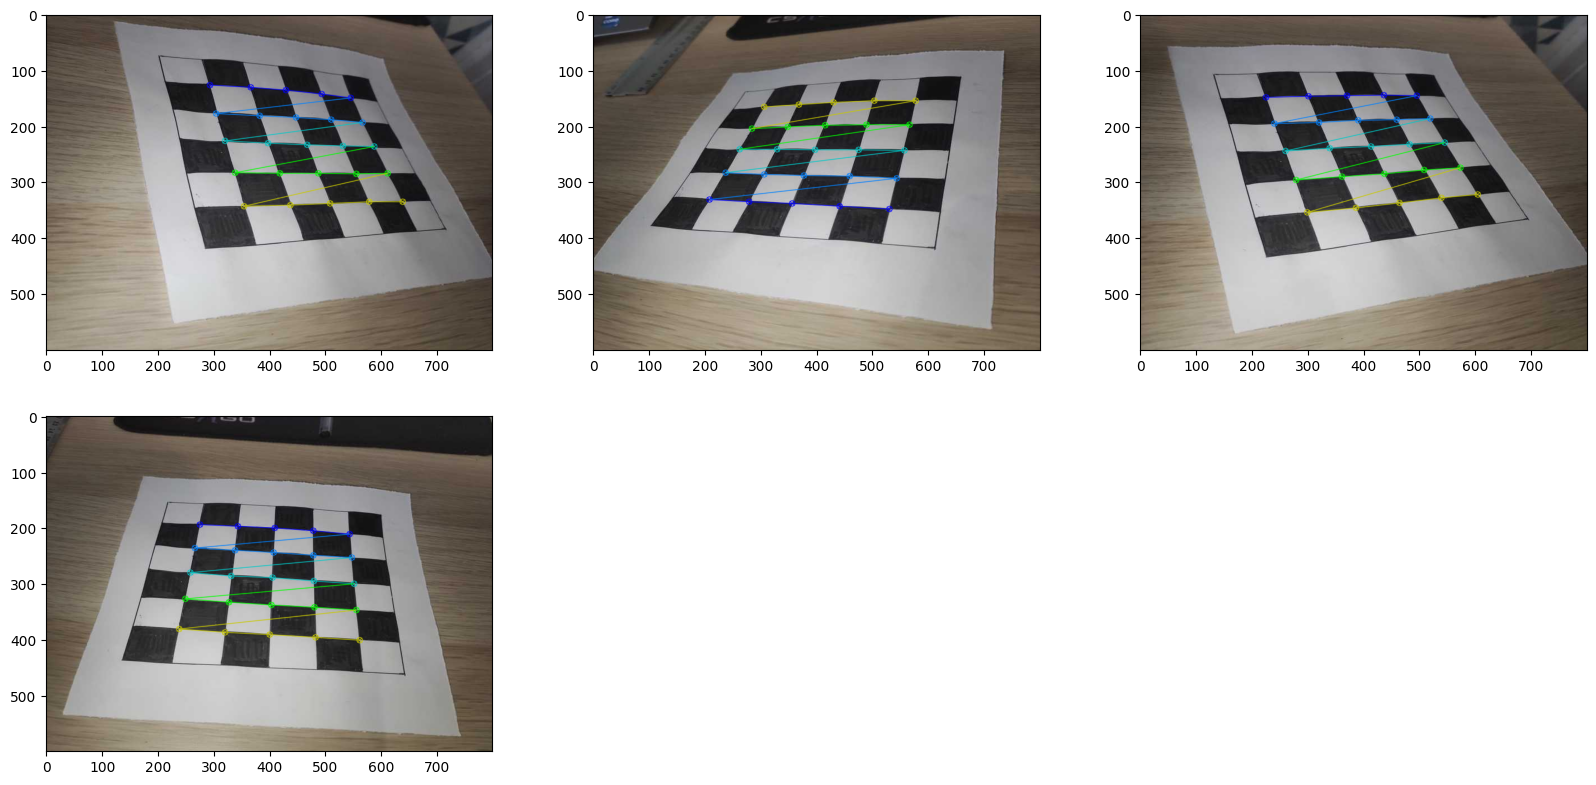

In [30]:
plt.figure(figsize=figsize)

for i, fn in enumerate(img_names):
    print("processing %s... " % fn)
    imgBGR = cv2.imread(fn)

    if imgBGR is None:
        print("Failed to load", fn)
        continue

    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2GRAY)
    print(f"Expected size: {w} x {h}")
    print(f"Actual size: {img.shape[1]} x {img.shape[0]}")

    assert (
        w == img.shape[1] and h == img.shape[0]
    ), f"size: {img.shape[1]} x {img.shape[0]}"
    found, corners = cv2.findChessboardCorners(img, pattern_size)

    if not found:
        print("chessboard not found")
        continue

    if i < 12:
        img_w_corners = cv2.drawChessboardCorners(imgRGB, pattern_size, corners, found)
        plt.subplot(4, 3, i + 1)
        plt.imshow(img_w_corners)

    print(f"{fn}... OK")
    img_points.append(corners.reshape(-1, 2))
    obj_points.append(pattern_points)


plt.show()

In [31]:
rms, camera_matrix, dist_coefs, _rvecs, _tvecs = cv2.calibrateCamera(
    obj_points, img_points, (w, h), None, None
)

print("\nRMS:", rms)
print("camera matrix:\n", camera_matrix)
print("distortion coefficients: ", dist_coefs.ravel())


RMS: 1.5165751557574554
camera matrix:
 [[807.24429824   0.         299.81346802]
 [  0.         598.42560268 296.62134854]
 [  0.           0.           1.        ]]
distortion coefficients:  [ 8.05895509e-01 -7.39319606e+00 -1.74839456e-02 -4.30503770e-02
  2.17528539e+01]
